<a href="https://colab.research.google.com/github/prisqia/EDA-Olympics-2021/blob/main/EDA_Olympics_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect To Kaggle

In [11]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [13]:
! cp kaggle.json ~/.kaggle/

In [14]:
! chmod 600 ~/.kaggle/kaggle.json

# Download Kaggle Dataset


In this EDA we used 2021 Olympics in Tokyo Dataset

In [15]:
! kaggle datasets download arjunprasadsarkhel/2021-olympics-in-tokyo

  0% 0.00/348k [00:00<?, ?B/s]
100% 348k/348k [00:00<00:00, 46.9MB/s]


In [16]:
! mkdir Tokyo_Olympics

mkdir: cannot create directory ‘Tokyo_Olympics’: File exists


In [17]:
! unzip 2021-olympics-in-tokyo.zip -d Tokyo_Olympics

Archive:  2021-olympics-in-tokyo.zip
  inflating: Tokyo_Olympics/Athletes.xlsx  
  inflating: Tokyo_Olympics/Coaches.xlsx  
  inflating: Tokyo_Olympics/EntriesGender.xlsx  
  inflating: Tokyo_Olympics/Medals.xlsx  
  inflating: Tokyo_Olympics/Teams.xlsx  


#Import Library

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean

# Create a Path from Data Folder

In [19]:
path_to_data = '/content/Tokyo_Olympics/'

In [20]:
df_athletes = pd.read_excel(path_to_data + 'Athletes.xlsx')
df_gender = pd.read_excel(path_to_data + 'EntriesGender.xlsx')
df_medals = pd.read_excel(path_to_data + 'Medals.xlsx')
df_teams = pd.read_excel(path_to_data + 'Teams.xlsx')

#EDA Medals

In [ ]:
df_medals

In [23]:
df_medals.isna().sum()

Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64

In [22]:
df_medals.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


In [24]:
df_medals['Total'].mean()

11.612903225806452

In [ ]:
# Weighted Mean
#np.average(df_medals["Total"], weights=df_medals["Gold"])

In [ ]:
# Trimmed Mean
# by taking the trim mean we could make it less sensitive
#trim_mean(df_medals["Total"], 0.1)

In [25]:
from statistics import variance, stdev

variance(df_medals["Gold"])

49.315100514259

In [26]:
stdev(df_medals["Gold"])

7.022471111671376

In [27]:
q3 = np.percentile(df_medals["Total"], 75)
q3

11.0

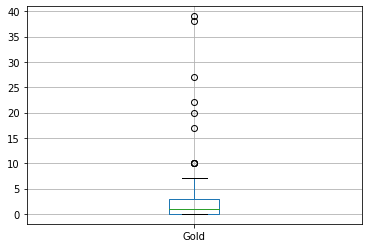

In [28]:
df_medals.boxplot(column="Gold", by=None, ax=None)

In [29]:
frequency_table = df_medals.copy()
frequency_table["freq"] = pd.cut(df_medals["Gold"], 10)
frequency_table.groupby("freq")["Rank"].count().reset_index() # Creates a frequency table of values based on the specified series and segment number

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


In [31]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Golds by Nationality')

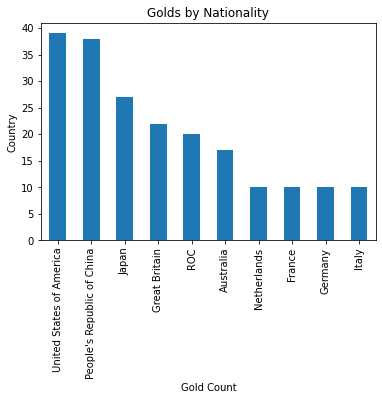

In [60]:
ax = df_medals.iloc[:10, :].plot.bar(x="Team/NOC", y="Gold", legend=False)
ax.set_xlabel('Gold Count')
ax.set_ylabel('Country')
plt.title('Golds by Nationality')

In [61]:
df_medals.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


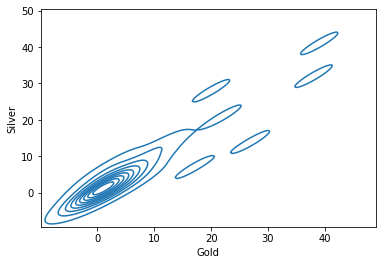

In [33]:
import seaborn as sns
ax = sns.kdeplot(df_medals["Gold"], df_medals["Silver"])

#EDA Athletes

In [37]:
df_athletes.isna().sum()

Name          0
NOC           0
Discipline    0
dtype: int64

In [38]:
df_athletes.describe()

,Name,NOC,Discipline
count,11085,11085,11085
unique,11062,206,46
top,PEREZ Maria,United States of America,Athletics
freq,2,615,2068


In [39]:
df_athletes.duplicated().sum()

1

Notes :
*   If there are any duplicate data, it would be wise if we remove it
*   don't forget to used reset.index to update the data frame



In [40]:
df_athletes = df_athletes.drop_duplicates().reset_index(drop=True)

In [41]:
df_athletes 

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball
...,...,...,...
11079,ZWICKER Martin Detlef,Germany,Hockey
11080,ZWOLINSKA Klaudia,Poland,Canoe Slalom
11081,ZYKOVA Yulia,ROC,Shooting
11082,ZYUZINA Ekaterina,ROC,Sailing


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


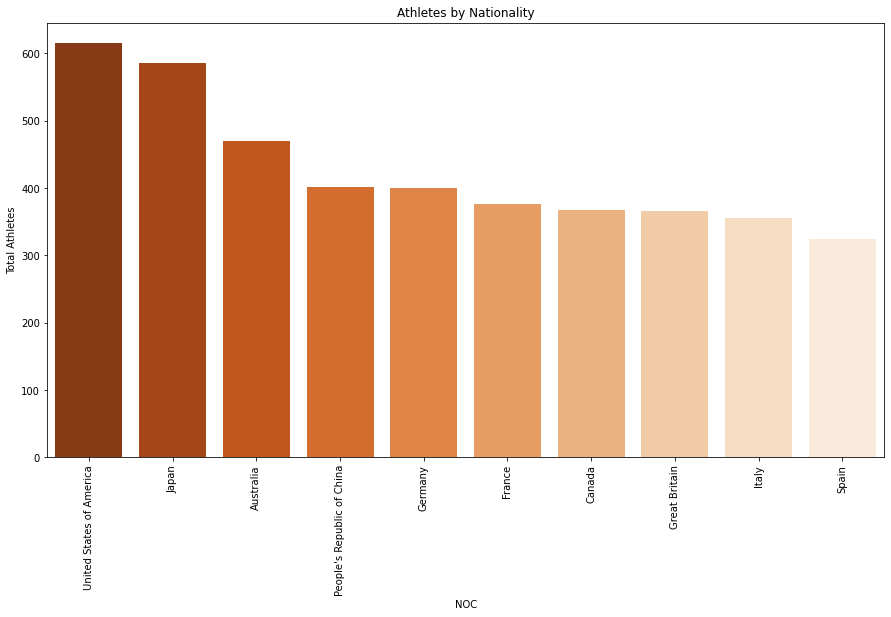

In [52]:
plt.figure(figsize=(15,8))
ax = sns.countplot('NOC',
                   data = df_athletes,
                   order=df_athletes.NOC.value_counts(ascending=False).iloc[:10].index,
                   palette="Oranges_r")
plt.xticks(rotation=90)
plt.ylabel('Total Athletes')
plt.title('Athletes by Nationality')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


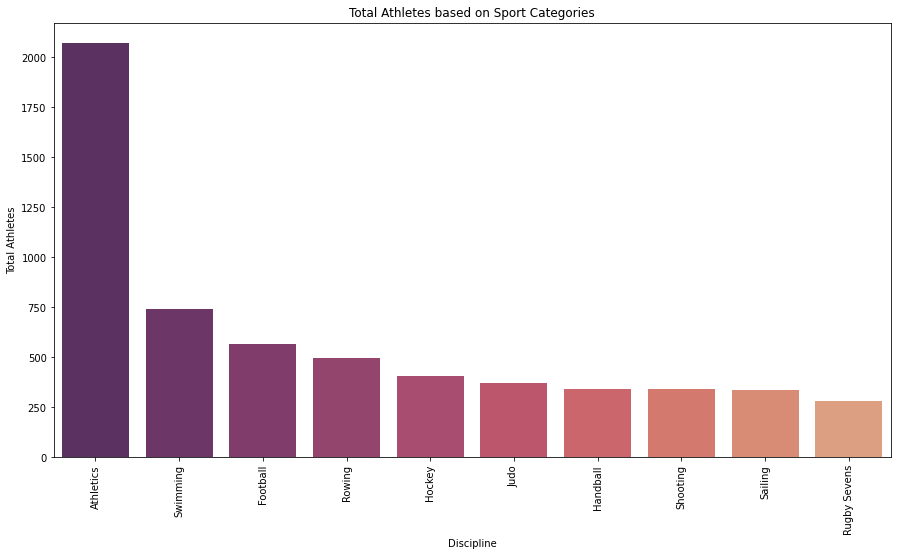

In [70]:
plt.figure(figsize=(15,8))
ax = sns.countplot('Discipline',
                   data = df_athletes,
                   order=df_athletes.Discipline.value_counts(ascending=False).iloc[:10].index,
                   palette="flare_r")
plt.xticks(rotation=90)
plt.ylabel('Total Athletes')
plt.title('Total Athletes based on Sport Categories')
plt.show()